# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

In [1]:
# imports #

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
## q1.1 ##

sides = np.array([1, 2, 3, 4, 5, 6]) 

pdf = np.zeros(6)
for i in range(6):
    for j in range(6):
        min_ij = np.min([sides[i], sides[j]])
        pdf[min_ij - 1] += 1
pdf = pdf / 36
cdf = np.cumsum(pdf)


N = 1000
d1 = np.random.choice(sides, size = N)
d2 = np.random.choice(sides, size = N)
min_roll = [min([d1[i], d2[i]]) for i in range(N)]

ecdf = np.zeros(6)
for i in range(6):
    ecdf[i] = (1 / N) * np.sum(min_roll <= sides[i])

Text(0.5, 1.0, 'empirical and theoretical CDF')

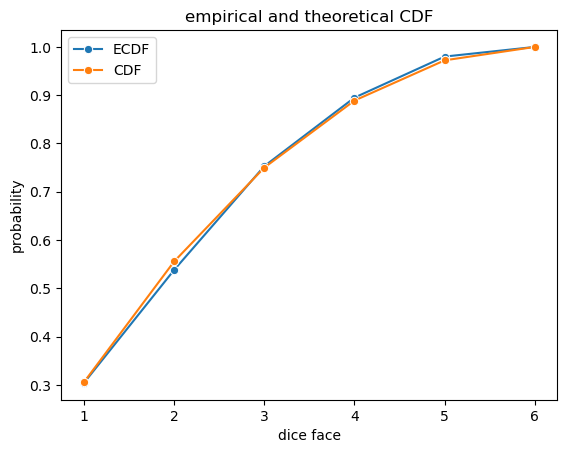

In [12]:
sns.lineplot(x = sides, y = ecdf, label = 'ECDF', marker = 'o')
sns.lineplot(x = sides, y = cdf, label = 'CDF', marker = 'o')

plt.xlabel("dice face")
plt.ylabel("probability")
plt.title('empirical and theoretical CDF')

In [16]:
## q1.2 ##

sides = np.array([1, 2, 3, 4, 5, 6])

N = 5000
d1 = np.random.choice(sides, size = N)
d2 = np.random.choice(sides, size = N)
d3 = np.random.choice(sides, size = N)
median_roll = [int(np.median([d1[i], d2[i], d3[i]])) for i in range(N)]

expected_val = np.sum(median_roll) / N
print('expected val: ', expected_val)

ecdf = np.zeros(6)
single = np.zeros(6)
for i in range(6):
    ecdf[i] = (1 / N) * np.sum(median_roll <= sides[i])
    single[i] = (1 / N) * np.sum(d1 <= sides[i])
expected_val = np.sum(median_roll) / N

expected val:  3.5246


Text(0.5, 1.0, 'median and single roll CDF')

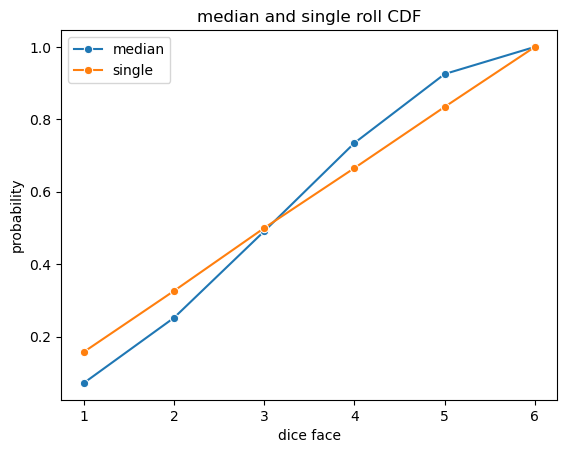

In [18]:
sns.lineplot(x = sides, y = ecdf, label = 'median', marker = 'o')
sns.lineplot(x = sides, y = single, label = 'single', marker = 'o')


plt.xlabel("dice face")
plt.ylabel("probability")
plt.title('median and single roll CDF')

In [19]:
## q1.3 ##

N = 50000
results = []
for i in range(N):
    go = True
    sum = 0
    while go is True:
        roll = np.random.choice(sides, size = 1)
        sum += roll
        if roll < 6:
            go = False
            results.append(int(sum[0]))
results = pd.DataFrame(results)

                  0
count  50000.000000
mean       4.215720
std        3.288191
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       38.000000


<Axes: ylabel='Count'>

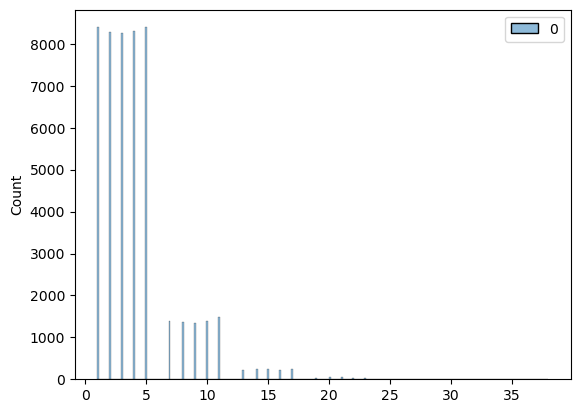

In [24]:
print(results.describe())
sns.histplot(results)

<Axes: ylabel='Proportion'>

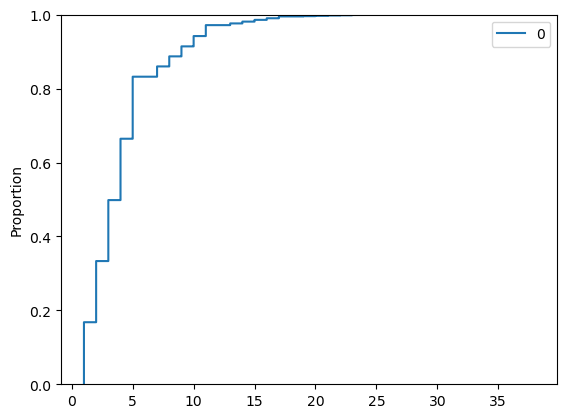

In [23]:
sns.ecdfplot(results)

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant $\times$ age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Estimate the model, and plot the predicted survival probability by age, hued for people who receive a heart transplant and those who don't. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

In [25]:
## q4.1 ##

df = pd.read_csv('./data/heart_hw.csv')
df.tail()

,Unnamed: 0,age,transplant,y
98,99,30,control,1
99,100,48,treatment,1
100,101,40,treatment,1
101,102,48,treatment,1
102,103,33,treatment,1


In [40]:
df['treat'] = 0
df['intercept'] = 1
df.loc[df['transplant'] == 'treatment', 'treat'] = 1
print(pd.crosstab(df['transplant'], df['y']), '\n')

y            0   1
transplant        
control     30   4
treatment   45  24 



In [36]:
# a. control proportion #
print('control proportion survived: ', 4/34)

# b. avg treatment effect # 
print('avg treatment effect: ', (24/(45+24)) - (4/(30+4))) # part/whole treatment - part/whole control #

control proportion survived:  0.11764705882352941
avg treatment effect:  0.23017902813299232


In [43]:
## q4.2 ##

from sklearn.linear_model import LinearRegression

X = df.loc[:, ['intercept', 'treat']]
Y = df['y']

reg = LinearRegression(fit_intercept = False).fit(X, Y)

print('regression coefficients: ', reg.coef_)

# the const of the regression corresponds to avg outcome in the control group
# slope in the regression corresponds to avg treatment effect

regression coefficients:  [0.11764706 0.23017903]


In [45]:
## q4.3 ##

X = df.loc[:,['intercept', 'treat', 'age']]
Y = df['y']

reg = LinearRegression(fit_intercept = False).fit(X, Y)

print('regression coefficients: ', reg.coef_)

# factoring in age accounts for some bias towards diff age groups
# older ppl are probs less likely to survive organ transplantation and are also
# more likely to need an organ transplant, so the covariance b/w treatment and 
# the omitted var is positive –> the OVB related to age will be neg, decreasing the coeff
# on treatment effect, which is what's shown; controlling for age causes treatment effect
# to go up and slope on age to be neg

regression coefficients:  [ 0.70195697  0.26470169 -0.01360722]


<Axes: xlabel='age'>

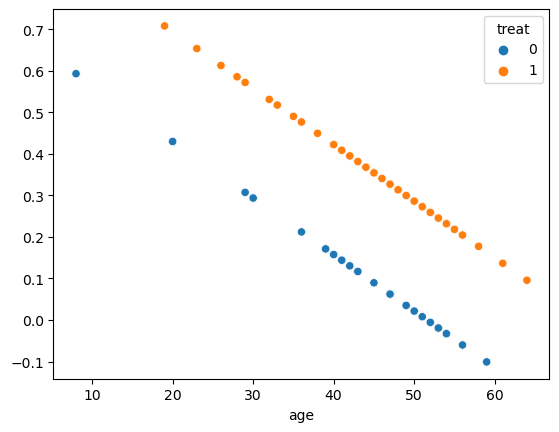

In [46]:
y_hat = reg.predict(X)

sns.scatterplot(x = df['age'], y = y_hat, hue = df['treat'])

In [53]:
## q4.4 ##

# testing interactions b/w age and treatment # 
df['treat_age'] = df['treat'] * df['age']
df['age_sq'] = df['age'] ** 2
df['treat_age_sq'] = df['treat'] * df['age_sq']

df['age_cu'] = df['age'] ** 3
df['treat_age_cu'] = df['treat'] * df['age_cu']

In [71]:
# X = df.loc[:, ['intercept', 'treat', 'age', 'treat_age', 'age_sq', 'treat_age_sq', 'age_cu', 'treat_age_cu']]
X = df.loc[:, ['intercept', 'treat', 'age', 'treat_age', 'age_sq', 'age_cu']]
Y = df['y']

reg = LinearRegression(fit_intercept = False).fit(X, Y)
print('regression coefficients: ', reg.coef_)

regression coefficients:  [-8.54714047e-01  5.86191756e-01  1.02563021e-01 -7.70114914e-03
 -2.70227509e-03  2.01932637e-05]


<Axes: xlabel='age'>

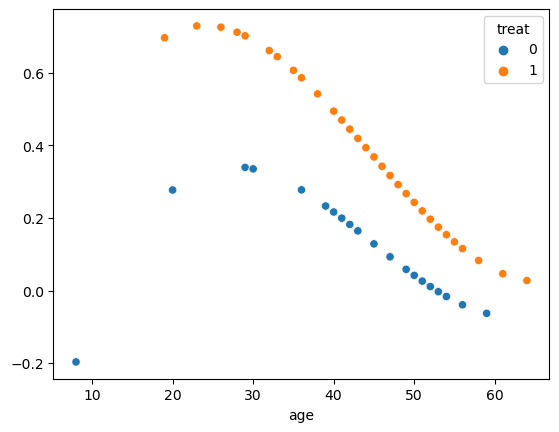

In [72]:
y_hat = reg.predict(X)
sns.scatterplot(x=df['age'], y = y_hat, hue = df['treat'])

<Axes: xlabel='age', ylabel='survival probability'>

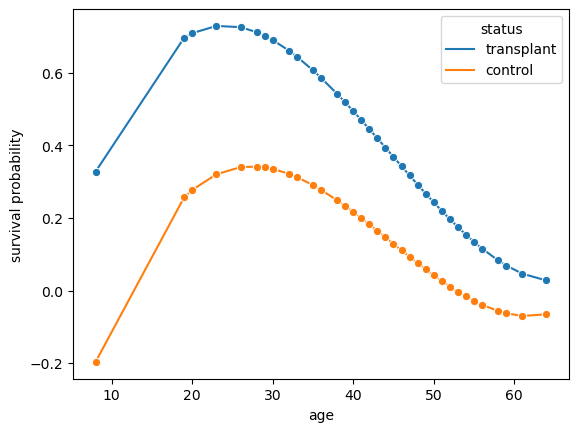

In [80]:
X_all_transplant = X
X_all_transplant['treat'] = 1
X_all_transplant['treat_age'] = X['age']
y_hat_transplant = reg.predict(X_all_transplant)

X_no_transplant = X
X_no_transplant['treat'] = 0
X_no_transplant['treat_age'] = 0
y_hat_control = reg.predict(X_no_transplant)

gdf_treat = pd.DataFrame({'survival probability':y_hat_transplant, 'age':X['age'], 'status':'transplant'})
gdf_control = pd.DataFrame({'survival probability':y_hat_control, 'age':X['age'], 'status':'control'})
gdf = pd.concat([gdf_treat, gdf_control], axis = 0)

sns.lineplot(data = gdf, x = 'age', y = 'survival probability', hue = 'status', marker = 'o')

# the below graph shows that, for the most part, the points for control vs. transplant have the same general trend, 
# starting low, climbing to a peak, and then gradually declining as age goes up
# biggest difference is that the transplant data points have a higher survivability probability
# another thing to notice is a steeper downwards decline (slope) for the transplant group, whereas in the
# control group, the downwards decline in survival probability is more gradual as age increases b/w ppl ages 30-50 (ballpark)
# also worth noting that Very young ppl have lower chance of survival than when in the 20s age range with lowest probability
# of surviving at 50-60s age range

Text(0.5, 1.0, 'age treatment effect')

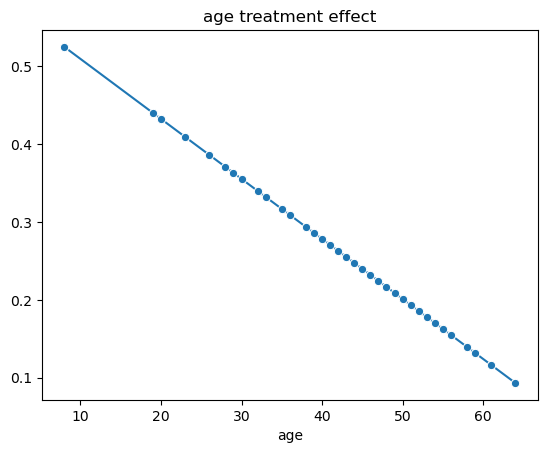

In [79]:
age_treatment_effect = y_hat_transplant - y_hat_control
sns.lineplot(x = X['age'], y = age_treatment_effect, marker = 'o').set_title('age treatment effect')

# this graph plots similar data as the above two, tho it's linear in nature showing that, on avg, ATE
# decreases as age increases

q4.5

algorithms arent law or good practice to 100% base off.. it's probably helpful to use these predictive algs to test what's *possible* based on data, but yeah, they're not fool proof miracle workers and cannot be the basis for decision-making. if this data were actually put into a IRL sitch, it'd mean giving heart transplants to ppl in their 20s and then working down the slope... this is PURELY predictive and takes zero account for what actually happens in real life, bc more often than not, life is not gonna follow the logic of some algorithm – everything is situational, this thing doesnt account the context and would not be ideal premise for who should be getting transplants and who shouldnt